# Data Analysis to Increase Product Performance

### __Objective__: To increase conversions for customers.

##### __Question__: What would you do keeping in mind that the customer uses this search product? How can you use this data to bring out insights to improve the search product?

Definitions of some terms:<br>

- Hits - Number of Search Queries
- Click-throughs - Number of times visitors clicked on any one of the results in the search listing page
- Clicks - Cumulative Number of times visitors clicked on any result in the search listing page
(Clicks would always be greater or equal to than clickthroughs)
- CTR = Clickthrough rate = Click Throughs/Hits
- Orders - Orders placed against the search query (Query report) or for the particular product (Product Performance report)
- You can ignore the initial price and final price from your analysis.

### Importing liraries

In [65]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

### Loading worksheet Product Description as data1

In [66]:
data1=pd.read_excel("Customer Raw data.xlsx",sheet_name='Product Description')
data1.head()

,PID,Product Name,Category,Final Price,Initial Price,Color,Primary Color,Fabric
0,CL0036386,Ikat stripe print cotton knit dress,Dress,84.95,33.95,Blue/navy/white,Blue,Cotton Spandex
1,CL0030567,Feminine pleated knit dress,Dress,59.95,41.95,Navy blue,Navy blue,Cotton Spandex
2,CL0032320,Floral embellished chambray denim maxi dress,Dress,96.95,67.95,Deep indigo,Deep indigo,Cotton
3,CL0036700,Dot print cap sleeve shirt,Top,49.95,19.95,White/navy,White,Cotton
4,CL0036365,Layered asymmetric hem hacci knit top,Top,69.95,27.95,Blue,Blue,Polyester


In [67]:
data1=data1.drop(['PID','Final Price','Initial Price'],1)
data1.head()

,Product Name,Category,Color,Primary Color,Fabric
0,Ikat stripe print cotton knit dress,Dress,Blue/navy/white,Blue,Cotton Spandex
1,Feminine pleated knit dress,Dress,Navy blue,Navy blue,Cotton Spandex
2,Floral embellished chambray denim maxi dress,Dress,Deep indigo,Deep indigo,Cotton
3,Dot print cap sleeve shirt,Top,White/navy,White,Cotton
4,Layered asymmetric hem hacci knit top,Top,Blue,Blue,Polyester


In [68]:
pd.set_option('display.max_rows',500)
for i in data1.columns:
    print(data1[i].value_counts())
    print("---------------------------------------------------------------")

 Chevron stripe colorblock maxi dress       7
 Havana dress                               4
 Notch collar wrap front top                3
 Piped trim cotton knit dress               3
 Olivia dress                               3
                                           ..
 Floral print two-buckle belt dress         1
 Trees digital print shift dress            1
 Morgan dress                               1
 Pleat sash waist paisley chambray dress    1
 Colorblock retro poplin frock              1
Name: Product Name, Length: 646, dtype: int64
---------------------------------------------------------------
 Dress       428
 Top         147
 Skirt        72
 Pant         49
 Jumpsuit     11
 Jacket        9
Name: Category, dtype: int64
---------------------------------------------------------------
 Black                                 39
 Deep navy                             23
 Deep indigo                           21
 Black/white                           18
 Black multi         

## Observations
- #### Chevron stripe colorblock maxi dress and Havana dress have high count
- #### 'Dress' Category of clothing is bought most frequestly and jumpsuit is the least bought
- #### 'cotton,cotton spandex, polyster' fabric is bought most and most prferred color is black

<AxesSubplot:xlabel='Category', ylabel='count'>

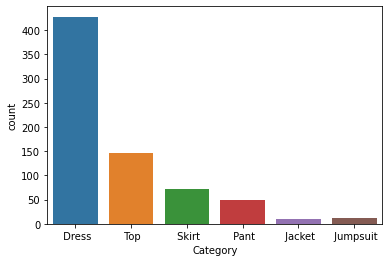

In [69]:
sns.countplot('Category',data=data1)

### Loading worksheet 'Product Performance' as data2

In [70]:
data2=pd.read_excel("Customer Raw data.xlsx",sheet_name='Product Performance')
data2=data2.drop('pId',1)
data2.head()

,pName,clicks,carts,orders
0,Chevron stripe colorblock maxi dress,29144,2181,204
1,Chevron stripe colorblock maxi dress,25892,237,70
2,Bird print pleated cotton knit dress,16343,340,97
3,Cotton knit fit and flare dress,16234,350,99
4,Pleat front chambray denim maxi dress,13317,229,56


In [71]:
pd.set_option('display.max_rows',500)
for i in data2.columns:
    print(data2[i].value_counts())
    print("---------------------------------------------------------------")

Name N/A                                            1230
Chevron stripe colorblock maxi dress                  14
Havana dress                                          10
Amelia dress                                           7
Olivia dress                                           7
                                                    ... 
Floral eyelet cotton ruched empire blouse              1
Taffeta trim stretch crepe maxi dress                  1
Floral crochet lace crop top and tulle skirt set       1
Jacquard knit drop yoke skirt                          1
Heart print cotton A-line dress                        1
Name: pName, Length: 1081, dtype: int64
---------------------------------------------------------------
13      35
25      30
22      29
18      28
15      26
        ..
1097     1
1092     1
1090     1
1078     1
724      1
Name: clicks, Length: 968, dtype: int64
---------------------------------------------------------------
0       1357
2         93
4         81
6    

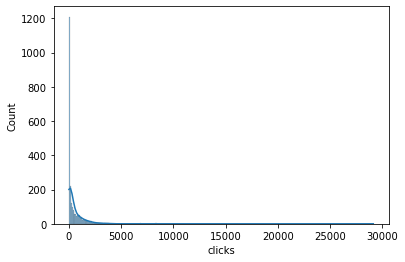

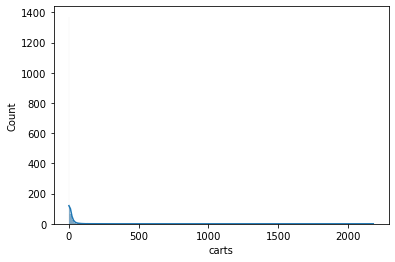

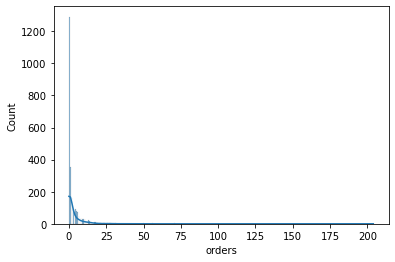

None


In [72]:
x=data2.loc[:,data2.columns!='pName']
def dist(x):
    for i in x:
        sns.histplot(x[i],kde=True)
        plt.show()
print(dist(x))

<AxesSubplot:xlabel='clicks', ylabel='carts'>

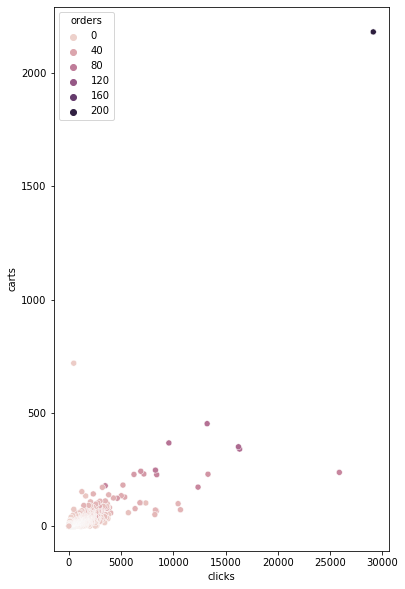

In [73]:
plt.figure(figsize=(6,10))
sns.scatterplot(x='clicks',y='carts' ,hue='orders',data=data2)

<AxesSubplot:xlabel='clicks', ylabel='carts'>

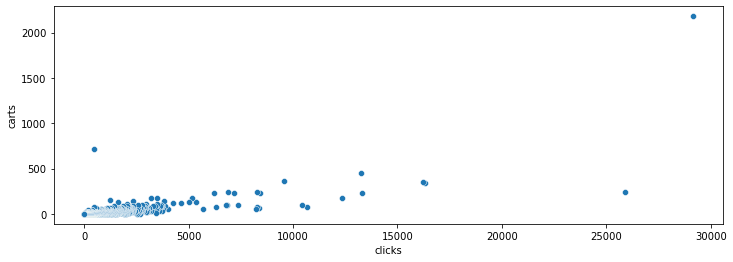

In [74]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='clicks',y='carts' ,data=data2)

## Observations
- #### Chevron stripe colorblock maxi dress is the most bought dress
- #### 204 is the highest number of order 
- #### Highest no of cart item added is 2181 which gave us highest orders
- #### No. of clicks and item added in cart are highly and similarly correlated to orders


<AxesSubplot:>

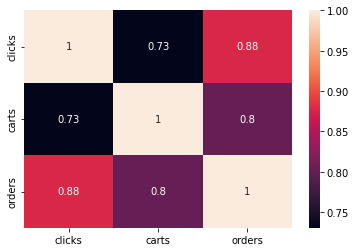

In [75]:
sns.heatmap(data2.corr(),annot=True)

### Loading worksheet Query performance as data3

In [76]:
data3=pd.read_excel("Customer Raw data.xlsx",sheet_name='Unbxd Query performance')
data3.head(10)

,query,hits,clicks,clickThroughs,ctr,carts,orders
0,pink,3971,330,93,2.34,18,0
1,Chambray,612,1360,447,73.04,145,8
2,gingham in green and white,601,0,0,0.00,0,0
3,white dresses,486,800,310,63.79,73,1
4,grey,480,89,28,5.83,10,0
5,grey dress,435,65,29,6.67,7,0
6,",maxi",378,888,286,75.66,117,13
7,green,376,723,237,63.03,64,9
8,birds,350,626,235,67.14,78,4
9,Purple,340,416,151,44.41,29,0


In [77]:
print(data1.shape)
print(data2.shape)
print(data3.shape)

(716, 5)
(2501, 4)
(500, 7)


<AxesSubplot:>

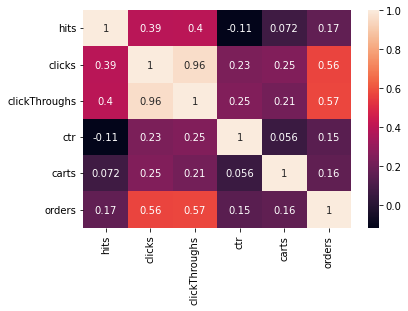

In [78]:
sns.heatmap(data3.corr(),annot=True)

- ### clicks and clikthrough are similarly correllated to orders
- ### ctr and carts is also similary correalted to orders


In [79]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   query          500 non-null    object 
 1   hits           500 non-null    int64  
 2   clicks         500 non-null    int64  
 3   clickThroughs  500 non-null    int64  
 4   ctr            500 non-null    float64
 5   carts          500 non-null    int64  
 6   orders         500 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 27.5+ KB


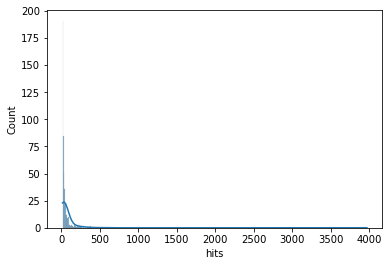

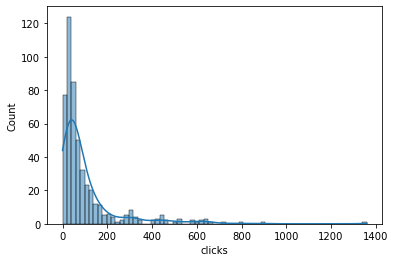

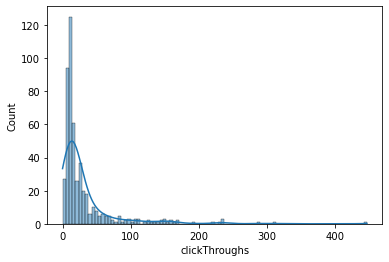

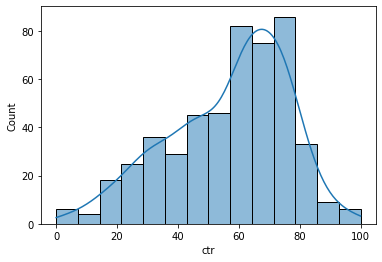

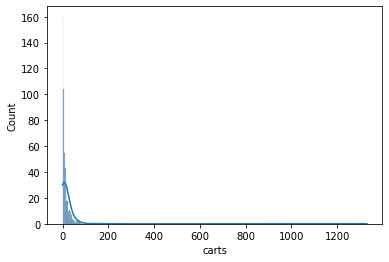

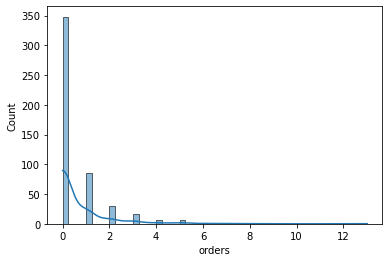

None


In [80]:
x=data3.loc[:,data3.columns!='query']
# x.head()
def dist(x):
    for i in x:
        sns.histplot(x[i],kde=True)
        plt.show()
print(dist(x))

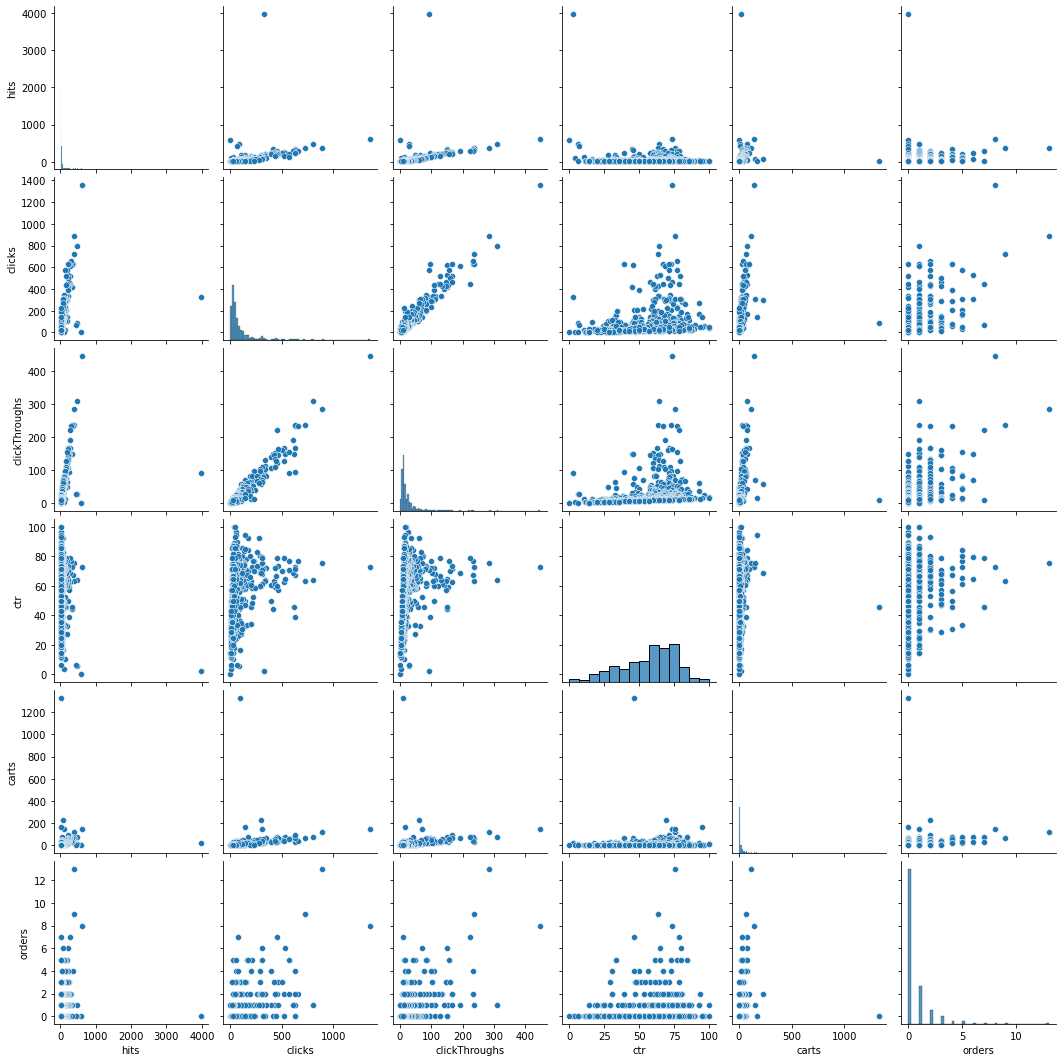

In [81]:
sns.pairplot(data3)

In [82]:
pd.set_option('display.max_rows',500)
data3.groupby(['query','orders'])['orders'].count()

query                                                               orders
\tCitron floral print dress                                         3         1
      Tie neck poplin dress                                         0         1
 CL0032310                                                          0         1
 CL0033768                                                          0         1
 CL0036477                                                          0         1
 Chevron dress                                                      1         1
 Cream                                                              0         1
 Loden Green                                                        0         1
 Olivia dress                                                       0         1
 Pleat waist poplin shirtdress                                      1         1
 stretch                                                            1         1
"Feminine pleated"                           

In [83]:
data3.describe()

,hits,clicks,clickThroughs,ctr,carts,orders
count,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000
mean,61.670000,99.620000,30.638000,56.63400,16.27600,0.622000
std,191.192464,143.261157,45.390523,19.59916,62.74962,1.357498
min,14.000000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,19.000000,27.000000,10.000000,42.86000,2.00000,0.000000
50%,26.000000,49.000000,15.000000,60.87000,6.00000,0.000000
75%,50.000000,106.000000,29.000000,71.43000,16.00000,1.000000
max,3971.000000,1360.000000,447.000000,100.00000,1330.00000,13.000000


In [84]:
data2.sort_values(["orders"],ascending=False)

,pName,clicks,carts,orders
0,Chevron stripe colorblock maxi dress,29144,2181,204
3,Cotton knit fit and flare dress,16234,350,99
2,Bird print pleated cotton knit dress,16343,340,97
5,Elastic waist chambray maxi dress,13234,452,91
9,Pleat waist poplin shirtdress,9571,367,89
...,...,...,...,...
1531,Name N/A,53,0,0
1530,Name N/A,53,0,0
1529,Marilyn dress,53,0,0
1528,Name N/A,53,0,0


In [85]:
data3.sort_values(["orders"],ascending=True)

,query,hits,clicks,clickThroughs,ctr,carts,orders
0,pink,3971,330,93,2.34,18,0
327,poppy,20,51,16,80.00,6,0
326,Rayon,20,49,11,55.00,18,0
325,Peach,20,50,12,60.00,0,0
324,Red heart embellished retro frock-Cream/red,20,72,8,40.00,14,0
323,Sets,20,20,8,40.00,4,0
322,Butterfly embellished colorblock dress-Juniper...,20,33,13,65.00,16,0
321,skater style cottone knit dress,21,60,14,66.67,6,0
320,shirts,21,12,9,42.86,8,0
319,Camo,21,40,14,66.67,2,0


## Observations:
#### - maxi,green,chambray,Sash waist chambray dress-Indigo,chevron are the queries that have given highest orders
#### - pink query has highest hits but has given 0 orders
#### - high no of clicks,clickthroghs has given high orders
#### - ctr and cart has less impact on orders

<AxesSubplot:xlabel='clicks', ylabel='clickThroughs'>

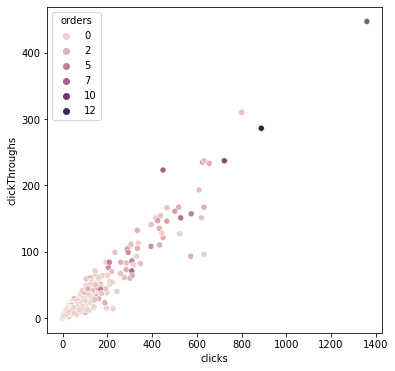

In [86]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='clicks',y='clickThroughs' ,hue='orders',data=data3)

<AxesSubplot:xlabel='hits', ylabel='clickThroughs'>

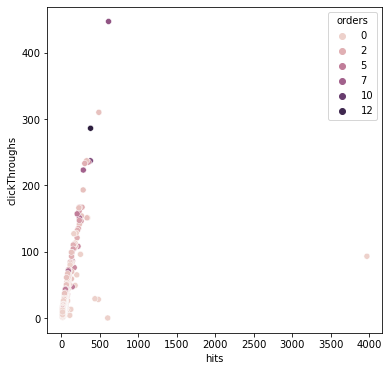

In [87]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='hits',y='clickThroughs' ,hue='orders',data=data3)

<AxesSubplot:xlabel='orders', ylabel='count'>

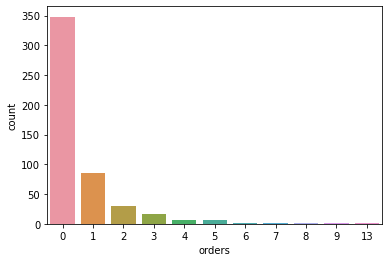

In [88]:
sns.countplot(x='orders',data=data3)

- ### As clicks increases clickthrough also increses
- ### clicks and clickthroughs are similarly correllated to hits
- ### max orders are 13 and lowest no of order is 0

# Conclusion:
### we can increase the conversion and search product in following ways:

- #### Focusing on increasing clicks and ClickThroughs which have given high conversion of orders
- #### Focusing on keywords which include dress,color black and fabric cotton as they are most bought categories
- #### Jacket and jumpsuit are the least bought so either try to have them in above category to increase their conversion or drop them from the outlet
- #### Excluding the keywords/query like pink,poppy, rayon, peach as they have given zero conversion
- #### As ctr is dependent on clickthrough and hits, high clickthrogh and less hits will give good ctr and ctr ranging from 40-80 has given good conversion
- #### Retarget the customers that frequently buy and add in cart
- #### Retarget the queries or keywords that have product name bought frequently
- #### Try to increase the least bought product performance by giving offers and discounts
- #### In the end it all depends on how you market the product by retargetting the specific audience and attracting new audience to make them regular audience by different means using offers,discounts,good keywords and queries, ad placing, quality ads, and customer freindly product